In [69]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [70]:
df = pd.read_csv("dataIQIYI-Copy1.csv")

In [72]:
X = df[['number_of_rating', 'rating_score', 'Lãng Mạn', 'Tình Tiết', 'Thanh Xuân', 'Thành Thị', 'Viễn Tưởng', 'Phim Hài', 'Bí Ẩn', 'Hành Động', 'Cổ Trang', 'Tình Bạn', 'Phiêu Lưu', 'Tội Phạm', 'Tình Yêu Ngọt Ngào', 'Gia Đình', 'Nhiệt Huyết', 'Kinh Dị', 'Tiểu Thuyết Chuyển Thể', 'Other']]
X

,number_of_rating,rating_score,Lãng Mạn,Tình Tiết,Thanh Xuân,Thành Thị,Viễn Tưởng,Phim Hài,Bí Ẩn,Hành Động,Cổ Trang,Tình Bạn,Phiêu Lưu,Tội Phạm,Tình Yêu Ngọt Ngào,Gia Đình,Nhiệt Huyết,Kinh Dị,Tiểu Thuyết Chuyển Thể,Other
0,14000,8.4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1600,9.4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4800,9.3,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1
3,56800,9.7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,8900,9.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2300,9.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1606,6100,9.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1607,33500,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1608,6000,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
# Chuyển đổi nhãn về dạng số
#label_encoder = LabelEncoder()
#df['Hot'] = label_encoder.fit_transform(df['Hot'])
# Chọn các đặc điểm để dự đoán HOT
X = df[['number_of_rating', 'rating_score', 'Lãng Mạn', 'Tình Tiết', 'Thanh Xuân', 'Thành Thị', 'Viễn Tưởng', 'Phim Hài', 'Bí Ẩn', 'Hành Động', 'Cổ Trang', 'Tình Bạn', 'Phiêu Lưu', 'Tội Phạm', 'Tình Yêu Ngọt Ngào', 'Gia Đình', 'Nhiệt Huyết', 'Kinh Dị', 'Tiểu Thuyết Chuyển Thể', 'Other']].values
y = df['hot'].values
# Chuyển đổi nhãn về dạng số
#
le = LabelEncoder()
y = le.fit_transform(df['hot'])
print("Nhãn tương ứng:")
for label, class_name in enumerate(le.classes_):
    print(f"{label}: {class_name}")
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nhãn tương ứng:
0: 0
1: 1


In [42]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo mô hình k-NN với k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán nhãn của các mẫu trong tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       283
           1       0.75      0.62      0.68        39

    accuracy                           0.93       322
   macro avg       0.85      0.79      0.82       322
weighted avg       0.92      0.93      0.93       322



In [43]:
#y_pred
df_predictions = pd.DataFrame(y_pred, columns=['Predictions'])
df_predictions

,Predictions
0,0
1,0
2,1
3,0
4,0
...,...
317,0
318,0
319,0
320,0


<Figure size 800x600 with 0 Axes>

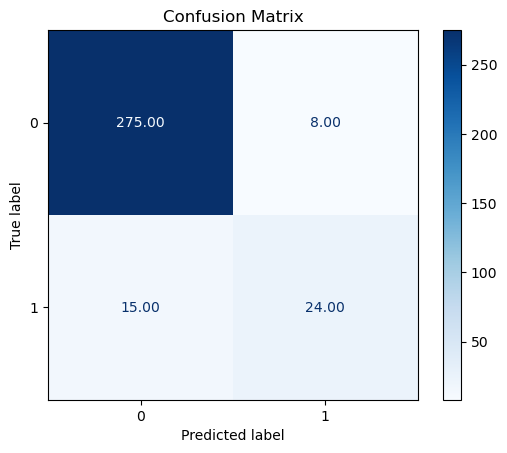

In [58]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=knn.classes_).plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix')
plt.show()

In [77]:
data = pd.read_csv("dataIQIYI-Copy1.csv")

In [78]:
X2 = data[['number_of_rating', 'rating_score']]
X2

,number_of_rating,rating_score
0,14000,8.4
1,1600,9.4
2,4800,9.3
3,56800,9.7
4,8900,9.6
...,...,...
1605,2300,9.6
1606,6100,9.6
1607,33500,9.4
1608,6000,9.4


In [49]:
# Assuming X contains your features and y contains your binary labels
X2 = data[['number_of_rating', 'rating_score']]
y2 = data['hot']

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X2_train, y2_train)

# Predict labels for test set
y2_pred = log_reg.predict(X2_test)

# Evaluate model
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y2_test, y2_pred))

Accuracy: 0.9968944099378882
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.97      1.00      0.99        39

    accuracy                           1.00       322
   macro avg       0.99      1.00      0.99       322
weighted avg       1.00      1.00      1.00       322



In [61]:
#y_pred
data_predictions = pd.DataFrame(y2_pred, columns=['Predictions'])
data_predictions

,Predictions
0,0
1,0
2,1
3,0
4,0
...,...
317,0
318,0
319,0
320,0


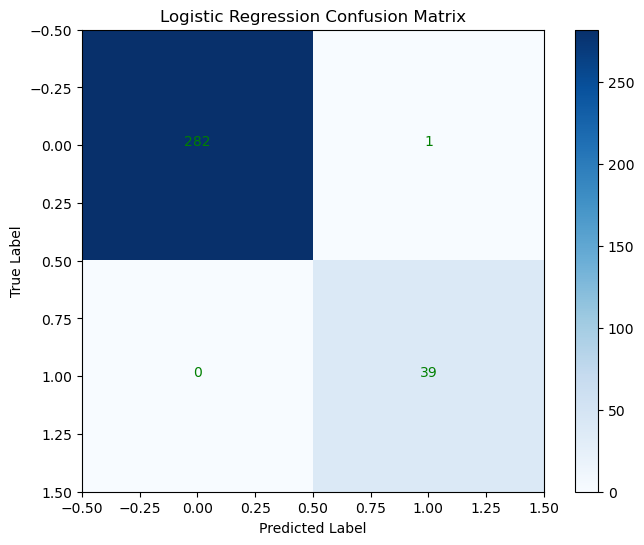

In [57]:
# Plot confusion matrix for Logistic Regression
y2_pred_log_reg = log_reg.predict(X2_test)
conf_mat_log_reg = confusion_matrix(y2_test, y2_pred_log_reg)

plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_log_reg, cmap=plt.cm.Blues, interpolation='nearest')

# Add text annotations
for i in range(conf_mat_log_reg.shape[0]):
    for j in range(conf_mat_log_reg.shape[1]):
        plt.text(j, i, conf_mat_log_reg[i, j], horizontalalignment='center', color='green')

plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
# Calculate precision, recall, and F1-score for kNN
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Calculate precision, recall, and F1-score for Logistic Regression
precision_log_reg = precision_score(y2_test, y2_pred_log_reg)
recall_log_reg = recall_score(y2_test, y2_pred_log_reg)
f1_log_reg = f1_score(y2_test, y2_pred_log_reg)

# Create a DataFrame for comparison
data = {
    'Model': ['kNN', 'Logistic Regression'],
    'Accuracy': [accuracy_knn, accuracy_log_reg],
    'Precision': [precision_knn, precision_log_reg],
    'Recall': [recall_knn, recall_log_reg],
    'F1-score': [f1_knn, f1_log_reg]
}

comparison_df = pd.DataFrame(data)

# Print the comparison table
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-score
0                  kNN  0.928571      0.750  0.615385  0.676056
1  Logistic Regression  0.996894      0.975  1.000000  0.987342


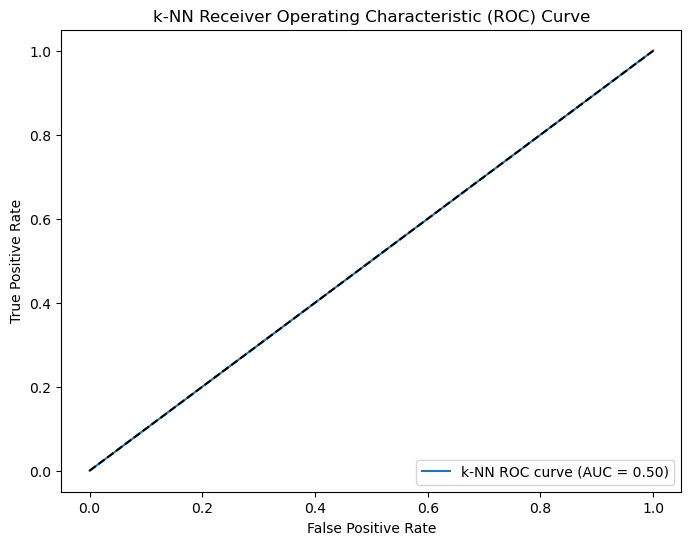

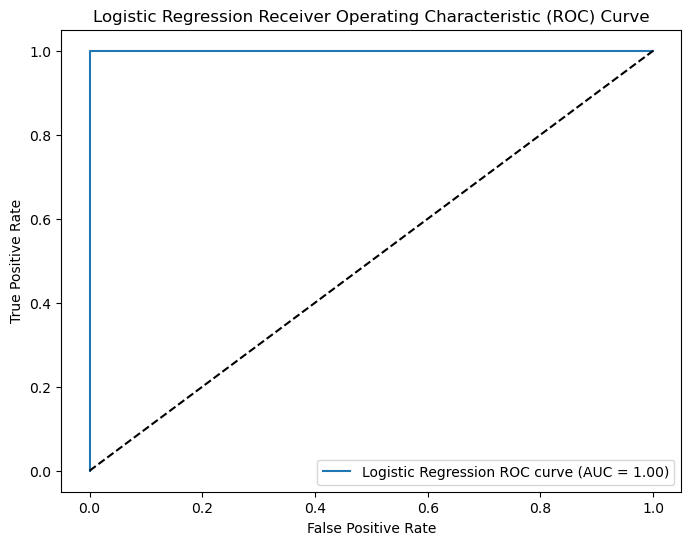

In [80]:
# Calculate ROC curve and AUC for kNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for kNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'k-NN ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y2_test, log_reg.predict_proba(X2_test)[:,1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression ROC curve (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()